In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.shape

(10841, 13)

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
#missing data
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df['Reviews'].value_counts()

Reviews
0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: count, Length: 6002, dtype: int64

In [9]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [10]:
#df['Reviews'] = df['Reviews'].astype(int)
df['Reviews'].str.isnumeric().sum()

10840

In [11]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df_clean = df.copy()
df_clean = df_clean.drop(df_clean.index[10472])
df_clean['Reviews'].str.isnumeric().sum()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [13]:
df_clean['Reviews'] = df_clean['Reviews'].astype(int)
df_clean.info()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [14]:
df_clean['Size'].value_counts()
df_clean['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
df_clean['Size'] = df_clean['Size'].str.replace("M", "000")
df_clean['Size'] = df_clean['Size'].str.replace("k", " ")
df_clean['Size'] = df_clean['Size'].replace("Varies with device", np.nan)
df_clean['Size'] = df_clean['Size'].astype(float)
df_clean['Size'].unique()


array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04,      nan,
       9.40e+00, 1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00,
       7.90e+00, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00,
       1.60e+04, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04,
       3.20e+04, 5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [17]:
df_clean['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [18]:
df_clean['Installs'].unique() 

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
df_clean['Price'].value_counts()
df_clean['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [20]:
chars_to_remove = ["+", ",", "$"]
cols_to_clean = ["Installs", "Price"]
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_clean[cols] = df_clean[cols].str.replace(item, "")

df_clean["Price"].unique()


array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [21]:
df_clean["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [22]:
df_clean['Price'] = df_clean['Price'].astype(float)
df_clean['Installs'] = df_clean['Installs'].astype(int)
df_clean.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,19579.419913,1.546434e+07,1.027368
std,0.515219,2.927761e+06,24042.062020,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [23]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
df_clean['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [25]:
df_clean['Last Updated'] = pd.to_datetime(df_clean['Last Updated'])
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [26]:
df_clean['Day'] = df_clean['Last Updated'].dt.day
df_clean['Month'] = df_clean['Last Updated'].dt.month
df_clean['Year'] = df_clean['Last Updated'].dt.year
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


**EDA**


In [27]:
df_clean[df_clean.duplicated('App')].shape

(1181, 16)

In [28]:
df_clean = df_clean.drop_duplicates(subset=['App'], keep='first')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

In [29]:
df_clean.shape

(9659, 16)

In [30]:
numeric_features = [feature for feature in df_clean.columns if df_clean[feature].dtype != 'O']
categorical_features = [feature for feature in df_clean.columns if df_clean[feature].dtype == 'O']


In [31]:
print(categorical_features)

['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


<Figure size 640x480 with 0 Axes>

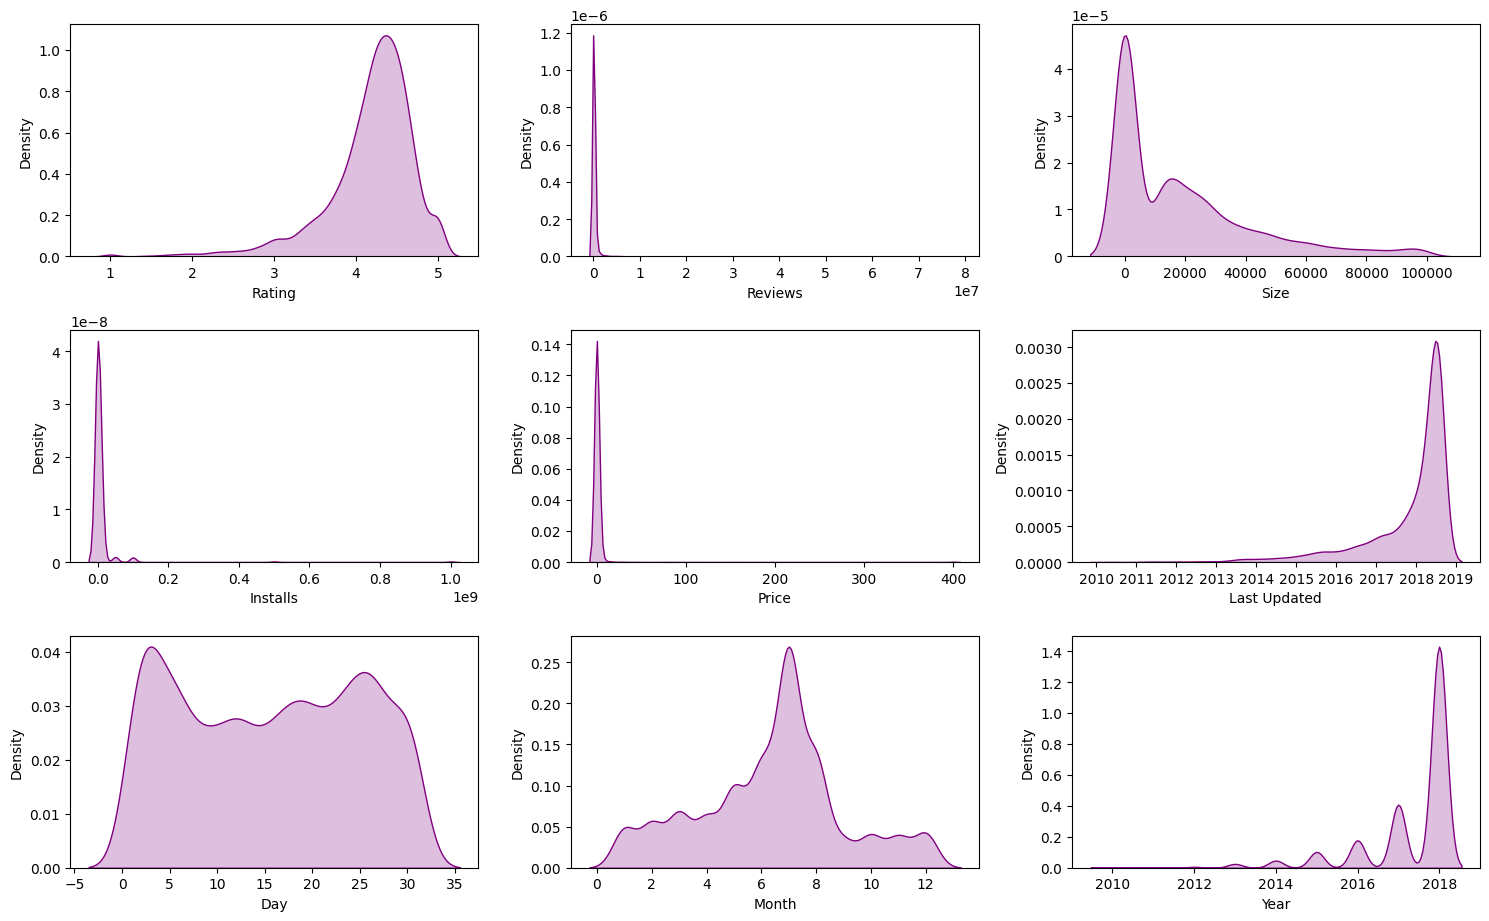

In [32]:
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
import warnings
warnings.filterwarnings("ignore")
plt.tight_layout() 


plt.figure(figsize=(15, 15))
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_clean[numeric_features[i]], color="purple", fill = True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

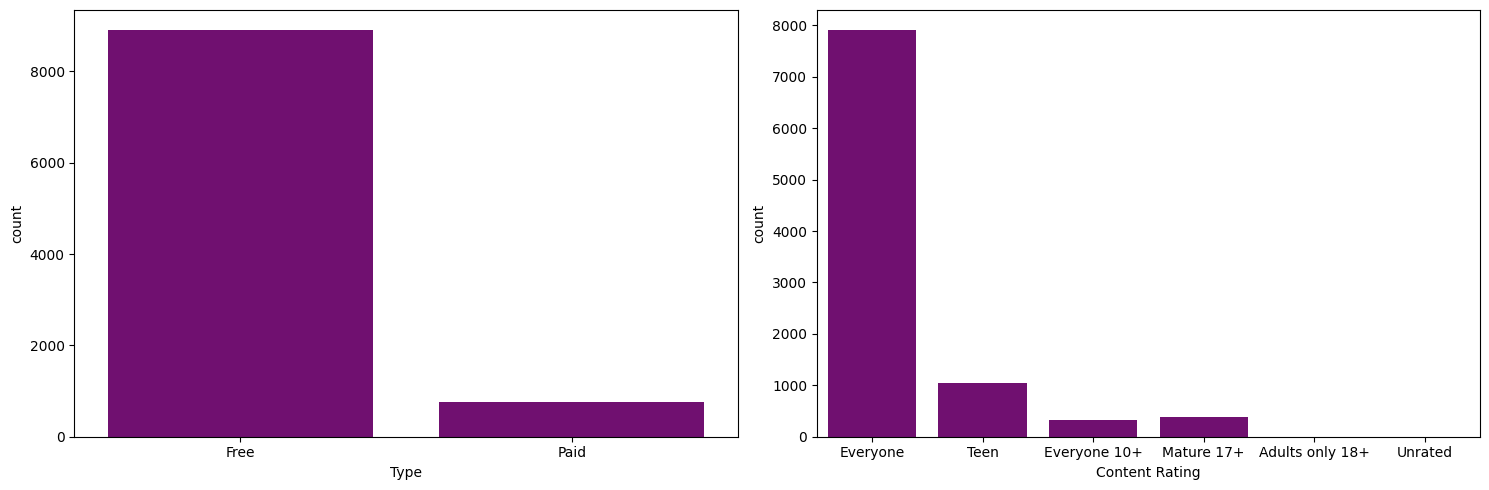

In [33]:
plt.figure(figsize=(15, 5))

category = ["Type", "Content Rating"]
for i in range(0, len(category)):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=df_clean[category[i]], color="purple", fill = True)
    plt.xlabel(category[i])
    plt.tight_layout()

In [34]:
df_clean["Category"].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [35]:
df_clean.groupby(['Category'])['Installs'].sum().sort_values(ascending = False)

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

In [36]:
df_cat_installs = df_clean.groupby("Category")[["Installs"]].sum().sort_values("Installs", ascending=False)

df_cat_installs['Installs'] = df_cat_installs['Installs']/1000000000
df_cat_installs

,Installs
Category,
GAME,13.878924
COMMUNICATION,11.038276
TOOLS,8.001772
PRODUCTIVITY,5.793091
SOCIAL,5.487868
PHOTOGRAPHY,4.649148
FAMILY,4.427942
VIDEO_PLAYERS,3.926903
TRAVEL_AND_LOCAL,2.894887


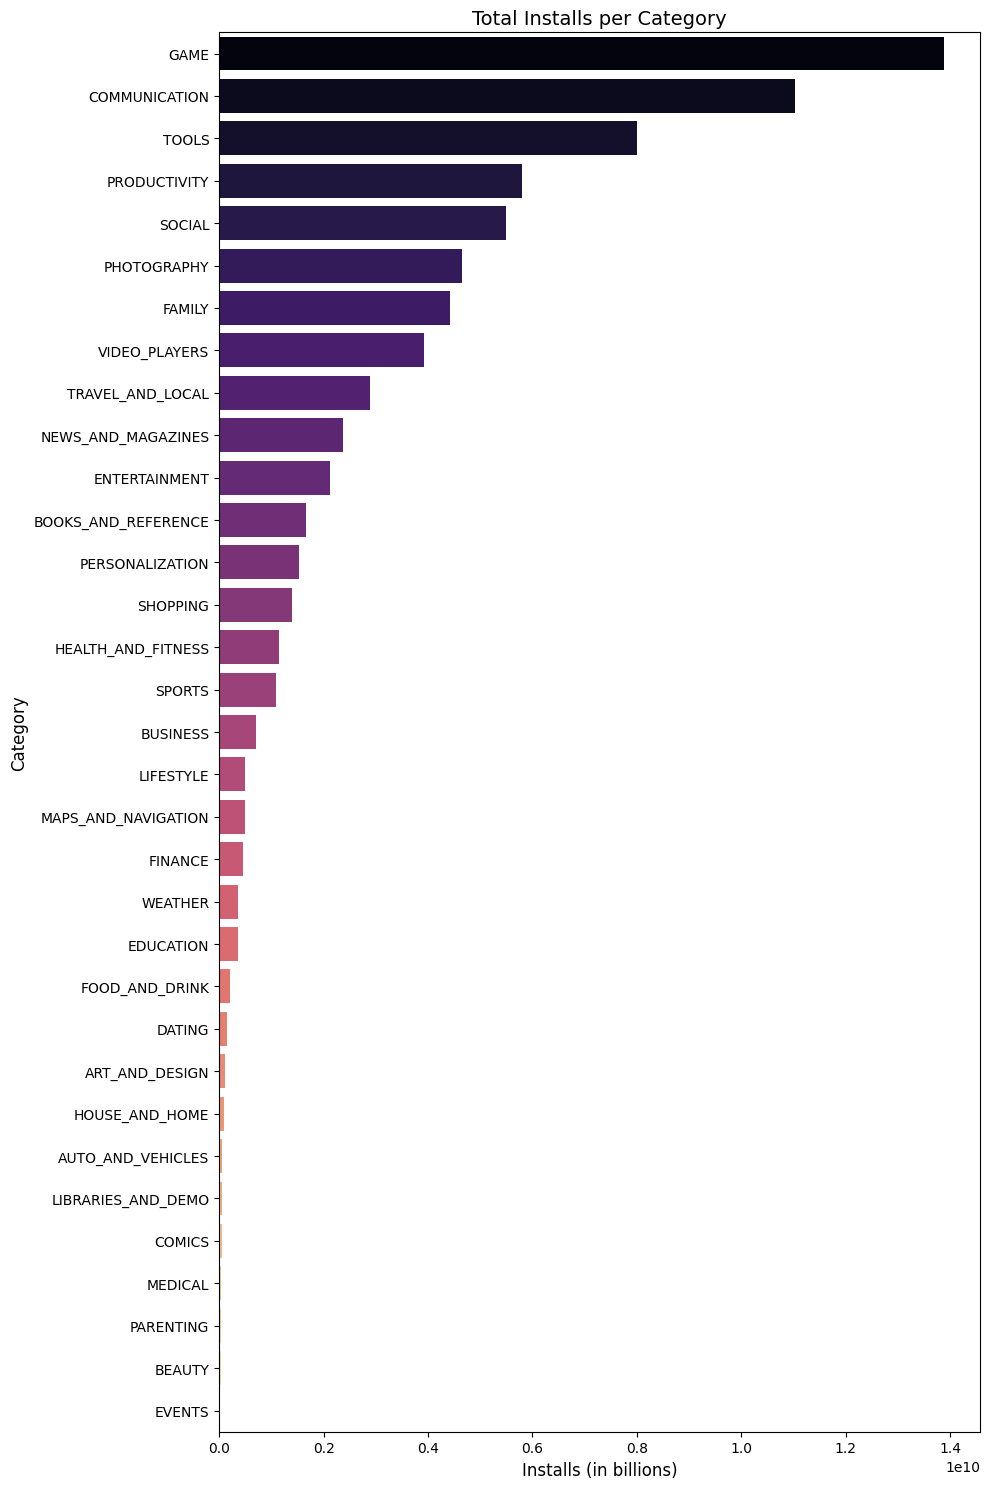

In [37]:
#top 10 categories by install
df2 = df_clean.groupby("Category")[["Installs"]].sum().sort_values("Installs", ascending=False)
df2 = df2.reset_index()

plt.figure(figsize=(10, 15))
sns.barplot(x="Installs", y="Category", data=df2, palette="magma")
plt.title("Total Installs per Category", fontsize=14)
plt.xlabel("Installs (in billions)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.tight_layout()
plt.show()

In [38]:
# top 5 app

In [39]:
apps = ['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL']

df_app_category = df_clean.groupby(['Category', 'App'])['Installs'].sum().reset_index()
df_app_category = df_app_category.sort_values("Installs", ascending = False)

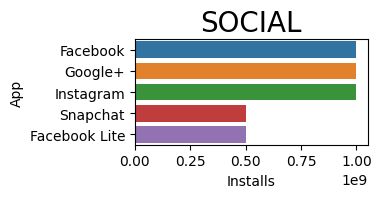

In [40]:
apps = ['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL']
for i, app in enumerate(apps):
    df2 = df_app_category[df_app_category.Category == app]
    df2 = df2.head(5)

plt.subplot(3, 2,i+1)
sns.barplot(data=df2, x ='Installs', y='App')
plt.title(app, size=20)
plt.tight_layout()
plt.show()

In [41]:
# 5 rating apps

In [42]:
rating_df = df_clean.groupby(['Category', 'Installs', 'App'])['Rating'].sum().reset_index()
top_rated_apps = rating_df[rating_df['Rating'] == 5.0]


In [43]:
top_rated_apps.shape

(271, 4)

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

In [45]:
df_clean['Android Ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9659, dtype: object

In [46]:
df_clean['Android Ver'] = df_clean['Android Ver'].replace('and up', '', regex=True)
df_clean['Android Ver']

0                    4.0.3 
1                    4.0.3 
2                    4.0.3 
3                      4.2 
4                      4.4 
                ...        
10836                  4.1 
10837                  4.1 
10838                  2.2 
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9659, dtype: object

In [47]:
df_clean['Android Ver'] = df_clean['Android Ver'].replace('Varies with device', '', regex=True).replace("W", ' regex=True').replace('', np.nan)
df_clean['Android Ver'].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       nan, '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ',
       '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '4.4W ', '7.1 ',
       '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [48]:
df_clean['Android Ver'].value_counts()

Android Ver
4.1              2202
4.0.3            1395
4.0              1285
4.4               818
2.3               616
5.0               512
4.2               372
2.3.3             273
2.2               239
3.0               231
4.3               221
2.1               133
1.6               116
6.0                54
7.0                42
3.2                36
2.0                32
5.1                22
1.5                20
4.4W               11
3.1                10
2.0.1               7
8.0                 6
7.1                 3
5.0 - 8.0           2
4.0.3 - 7.1.1       2
1.0                 2
7.0 - 7.1.1         1
4.1 - 7.1.1         1
5.0 - 6.0           1
2.2 - 7.1.1         1
5.0 - 7.1.1         1
Name: count, dtype: int64

In [49]:
df_clean[df_clean['Android Ver'].str.contains('-') == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
350,Web Browser & Explorer,COMMUNICATION,4.0,36901,6.6,5000000,Free,0.0,Everyone,Communication,2018-07-04,11.8.6,4.0.3 - 7.1.1,4,7,2018
352,Browser 4G,COMMUNICATION,4.3,192948,6.6,10000000,Free,0.0,Everyone,Communication,2018-06-19,24.6.6,4.0.3 - 7.1.1,19,6,2018
1572,ZenUI Safeguard,LIFESTYLE,4.5,100,7.1,1000000,Free,0.0,Everyone,Lifestyle,2018-05-09,1.0.0.21_180410,7.0 - 7.1.1,9,5,2018
2841,Photo Collage - Layout Editor,PHOTOGRAPHY,4.5,285788,46000.0,10000000,Free,0.0,Everyone,Photography,2017-12-04,1.8.0.170824_9,5.0 - 8.0,4,12,2017
3474,ASUS Quick Memo,PRODUCTIVITY,4.5,23089,1.6,10000000,Free,0.0,Everyone,Productivity,2018-04-11,1.10.0.33_180403,5.0 - 8.0,11,4,2018
4151,Google Now Launcher,TOOLS,4.2,857215,7.9,100000000,Free,0.0,Everyone,Tools,2017-12-07,1.4.large,4.1 - 7.1.1,7,12,2017
7571,My Style CM 13 Theme,PERSONALIZATION,4.5,314,11000.0,10000,Free,0.0,Everyone,Personalization,2016-09-08,1.9,5.0 - 6.0,8,9,2016
9310,EF Jumper,GAME,NaN,4,5.1,100,Free,0.0,Everyone,Arcade,2017-07-13,Build 12,2.2 - 7.1.1,13,7,2017
10094,EY Catalyst Reader,BUSINESS,NaN,1,8.4,5,Free,0.0,Everyone,Business,2018-04-10,1.2.1,5.0 - 7.1.1,10,4,2018


In [50]:
df_clean = df_clean[df_clean['Android Ver'].str.contains('-') == False]
df_clean['Android Ver'].value_counts()

Android Ver
4.1       2202
4.0.3     1395
4.0       1285
4.4        818
2.3        616
5.0        512
4.2        372
2.3.3      273
2.2        239
3.0        231
4.3        221
2.1        133
1.6        116
6.0         54
7.0         42
3.2         36
2.0         32
5.1         22
1.5         20
4.4W        11
3.1         10
2.0.1        7
8.0          6
7.1          3
1.0          2
Name: count, dtype: int64

In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8658 entries, 0 to 10838
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8658 non-null   object        
 1   Category        8658 non-null   object        
 2   Rating          7240 non-null   float64       
 3   Reviews         8658 non-null   int64         
 4   Size            8375 non-null   float64       
 5   Installs        8658 non-null   int64         
 6   Type            8658 non-null   object        
 7   Price           8658 non-null   float64       
 8   Content Rating  8658 non-null   object        
 9   Genres          8658 non-null   object        
 10  Last Updated    8658 non-null   datetime64[ns]
 11  Current Ver     8650 non-null   object        
 12  Android Ver     8658 non-null   object        
 13  Day             8658 non-null   int32         
 14  Month           8658 non-null   int32         
 15  Year    

In [52]:
df_clean['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity', 'Simulation',
       'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adven

In [53]:
df_clean.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1,18,6,2017
10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0,29,9,2016
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2,20,1,2017


In [54]:
mean_genres_installs = df_clean.groupby(['Genres'])['Installs'].mean() / 1000000
mean_genres_installs 

Genres
Action                                   11.255844
Action;Action & Adventure                 3.910955
Adventure                                 4.064319
Adventure;Action & Adventure             21.230000
Adventure;Brain Games                     0.100000
                                           ...    
Video Players & Editors                   7.093219
Video Players & Editors;Creativity        5.000000
Video Players & Editors;Music & Video     5.000000
Weather                                   2.270176
Word                                      5.208628
Name: Installs, Length: 117, dtype: float64

In [55]:
df_clean["Genres Encoded"] = mean_genres_installs
df_clean["Genres Encoded"] 

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10834   NaN
10835   NaN
10836   NaN
10837   NaN
10838   NaN
Name: Genres Encoded, Length: 8658, dtype: float64

In [56]:
mean_genres_installs = mean_genres_installs.to_dict()
mean_genres_installs

{'Action': 11.255844429065743,
 'Action;Action & Adventure': 3.9109545454545454,
 'Adventure': 4.064319452054795,
 'Adventure;Action & Adventure': 21.23,
 'Adventure;Brain Games': 0.1,
 'Adventure;Education': 10.0,
 'Arcade': 20.540684218390805,
 'Arcade;Action & Adventure': 2.7084616153846155,
 'Arcade;Pretend Play': 1.0,
 'Art & Design': 1.8308589285714287,
 'Art & Design;Action & Adventure': 0.1,
 'Art & Design;Creativity': 0.285,
 'Art & Design;Pretend Play': 0.5,
 'Auto & Vehicles': 0.5753873205128205,
 'Beauty': 0.303941,
 'Board': 2.859415641025641,
 'Board;Action & Adventure': 2.001666666666667,
 'Board;Brain Games': 0.5254733333333333,
 'Board;Pretend Play': 0.0001,
 'Books & Reference': 0.6850892182741116,
 'Books & Reference;Creativity': 0.0001,
 'Books & Reference;Education': 0.0055,
 'Business': 1.0347099612403101,
 'Card': 2.200636585365854,
 'Card;Action & Adventure': 5.5,
 'Casino': 2.980018918918919,
 'Casual': 17.919875741935485,
 'Casual;Action & Adventure': 4.909181

In [57]:
df_clean['Genres Encoded'] = df_clean['Genres'].map(mean_genres_installs)
df_clean['Genres Encoded']

0        1.830859
1        0.500000
2        1.830859
3        1.830859
4        0.285000
           ...   
10834    0.360664
10835    1.034710
10836    0.360664
10837    0.360664
10838    0.092978
Name: Genres Encoded, Length: 8658, dtype: float64